First, let's install and import some necessary librabries:



*   **imageio**: read the input image as a numpy matrix
*   **numpy**: numerical/matrix operations
* **matplotlib**: images visualization




In [1]:
! pip install numpy matplotlib imageio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

Read the input image using the imread function (mode = 'L' for grayscale images)  \
The result will be a 2D numpy matrix

In [3]:
image_path = 'einstein_example.jpg'  # Replace with your image path
image = imread(image_path, mode = 'L')
print('Shape of the input image: ', image.shape)

Shape of the input image:  (259, 194)


<ipython-input-3-aa8764143424>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path, mode = 'L')


Function to visualize a single image, or multiple images side-by-side.\
**Input**: A 2D numpy square matrix

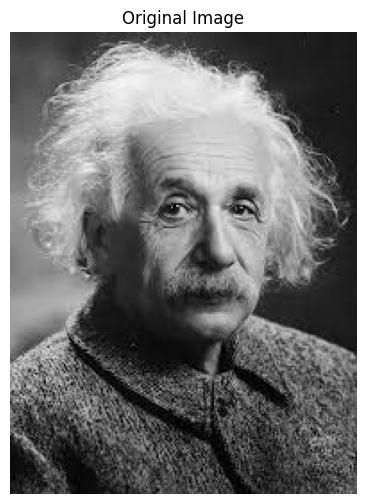

In [4]:
# Function to visualize the image
def visualize_image(image, title='Original Image'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

visualize_image(image)

In [11]:
def visualize_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Box Blur Kernel

In [12]:
# Function to create a box blur kernel
def box_blur_kernel(size):
    # Create a kernel of the given size where all elements are 1/(size*size)
    # This ensures the sum of the kernel elements is 1, making it an averaging filter
    return np.ones((size, size)) / (size * size)

# Function to apply convolution
def apply_convolution(image, kernel):
    # Initialize an output array of the same shape as the input image
    output = np.zeros_like(image)

    # Pad the image to handle borders during convolution
    # Padding is done with edge values (replicating the edge pixels)
    image_padded = np.pad(image, ((kernel.shape[0]//2, kernel.shape[0]//2),
                                  (kernel.shape[1]//2, kernel.shape[1]//2)), mode='edge')

    # Iterate over every pixel in the image
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            # Apply the convolution operation (element-wise multiplication and sum)
            output[x, y] = np.sum(kernel * image_padded[x:x+kernel.shape[0], y:y+kernel.shape[1]])

    # Return the convolved image
    return output

# Function to apply box blur
def apply_box_blur(image, kernel_size=3):
    # Create the box blur kernel
    kernel = box_blur_kernel(kernel_size)

    # Apply the convolution with the box blur kernel
    blurred_image = apply_convolution(image, kernel)

    # Return the blurred image
    return blurred_image

# Function to iteratively apply the blur function n times
def iterative_blur(image, kernel_size=3, n=5):
    # List to store the intermediate blurred images, starting with the original image
    images = [image]

    # Initialize the current image as the original image
    current_image = image

    # Apply the box blur iteratively n times
    for i in range(n):
        # Apply the box blur to the current image
        current_image = apply_box_blur(current_image, kernel_size)

        # Append the blurred image to the list
        images.append(current_image)

    # Return the list of images, including the original and all intermediate blurs
    return images

In [7]:
blurred_images = iterative_blur(image, kernel_size=3, n=1000)

In [8]:
image_1 = blurred_images[1]
image_10 = blurred_images[10]
image_25 = blurred_images[25]
image_50 = blurred_images[50]
image_100 = blurred_images[100]
image_200 = blurred_images[200]
image_1000 = blurred_images[1000]

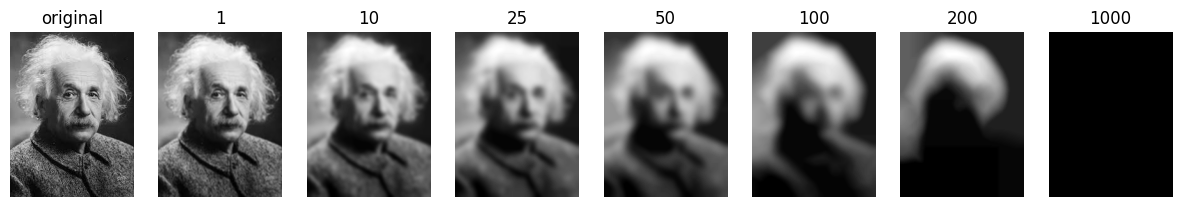

In [9]:
visualize_images([image, image_1, image_10, image_25, image_50, image_100, image_200, image_1000], ['original','1', '10', '25', '50', '100','200','1000'])

In [10]:
def save_image(image, filename, title='Image'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Example usage
# Read the image
# image_path = '/mnt/data/image.png'  # Replace with your image path
# image = imread(image_path, pilmode='F')  # Use pilmode='F' for a floating-point grayscale image

# Save the original image
save_image(image_1, 'blurred_1.png', title='Original Image')

# Shift kernel

In [13]:
def create_shift_filter(direction):
    size = 3  # Using a 3x3 filter
    filter = np.zeros((size, size))

    if direction == 'left':
        filter[size//2, min(size//2 + 1, size-1)] = 1
    elif direction == 'right':
        filter[size//2, max(size//2 - 1, 0)] = 1

    elif direction == 'up':
        filter[min(size//2 + 1, size-1), size//2] = 1
    elif direction == 'down':
        filter[max(size//2 - 1, 0), size//2] = 1

    return filter

# Function to apply shifting filter
def apply_shifting_filter(image, direction):
    kernel = create_shift_filter(direction)
    shifted_image = apply_convolution(image, kernel)
    return shifted_image

# Function to iteratively apply the shifting filter n times and save the images
def iterative_shift(image, direction, n):
    images = [image]
    current_image = image
    for i in range(n):
        current_image = apply_shifting_filter(current_image, direction)
        images.append(current_image)
        # save_image(current_image, f'shifted_image_{direction}_{i+1}.png', title=f'Shift {direction} - {i+1}')
    return images


In [14]:
# Apply iterative shifting and save the images
direction = 'left'  # Direction to shift ('left', 'right', 'up', 'down')
n = 100              # Number of iterations

shifted_images_left = iterative_shift(image, direction, n)

left_50  = shifted_images_left[50]
left_100 = shifted_images_left[100]

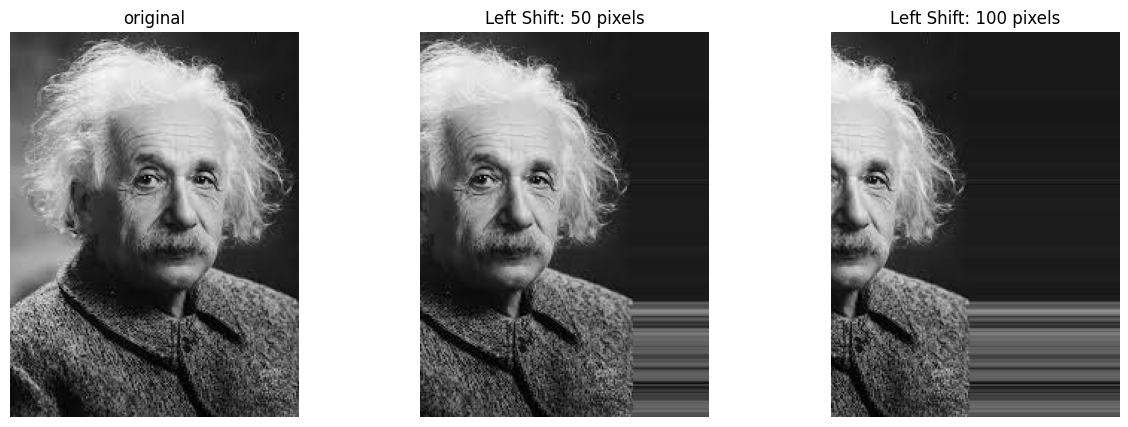

In [15]:
visualize_images([image, left_50, left_100], ['original','Left Shift: 50 pixels', 'Left Shift: 100 pixels'])

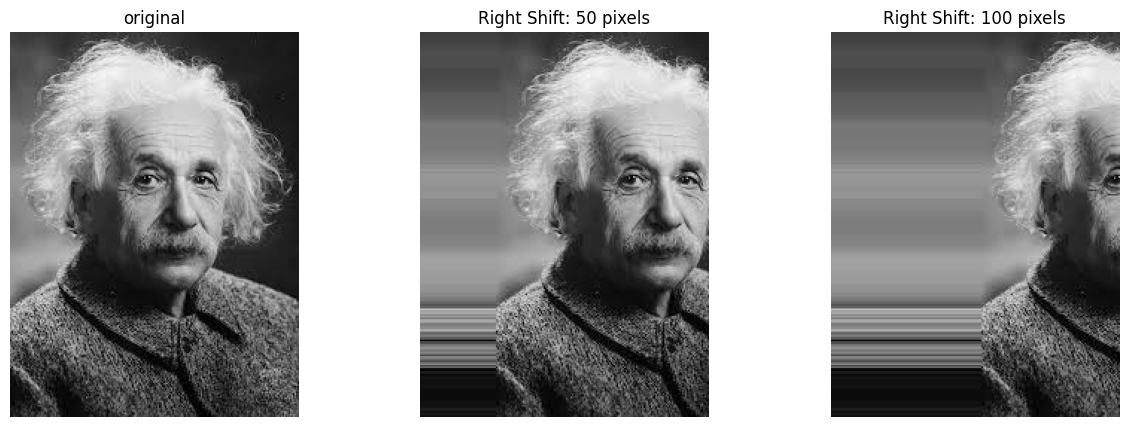

In [16]:
# Apply iterative shifting and save the images
direction = 'right'  # Direction to shift ('left', 'right', 'up', 'down')
n = 100              # Number of iterations

shifted_images_right = iterative_shift(image, direction, n)
right_50  = shifted_images_right[50]
right_100 = shifted_images_right[100]

# visualize_images([image, image_1, image_10, image_25, image_50, image_100, image_200, image_1000], ['original','1', '10', '25', '50', '100','200','1000'])
visualize_images([image, right_50, right_100], ['original','Right Shift: 50 pixels', 'Right Shift: 100 pixels'])

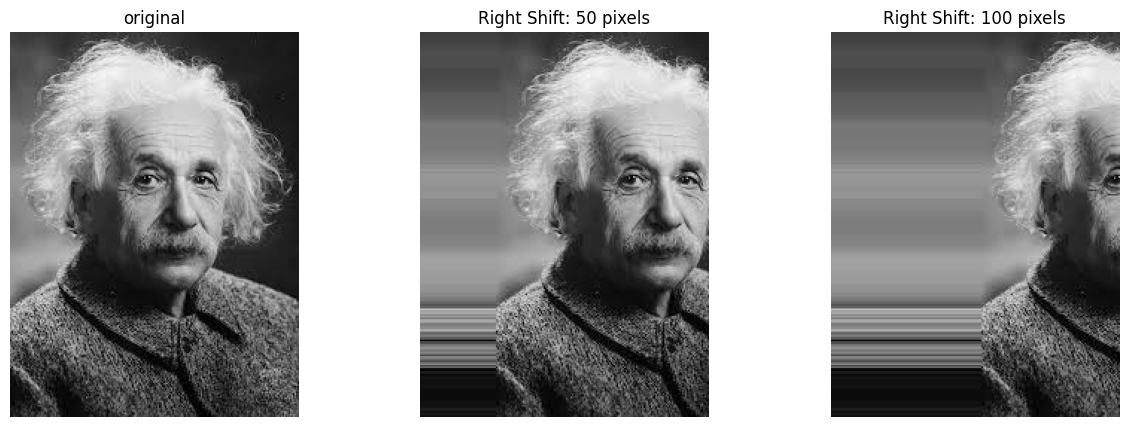

In [17]:
visualize_images([image, right_50, right_100], ['original','Right Shift: 50 pixels', 'Right Shift: 100 pixels'])

In [18]:
direction = 'up'  # Direction to shift ('left', 'right', 'up', 'down')
n = 100              # Number of iterations

shifted_images_up = iterative_shift(image, direction, n)
up_50  = shifted_images_up[50]
up_100 = shifted_images_up[100]

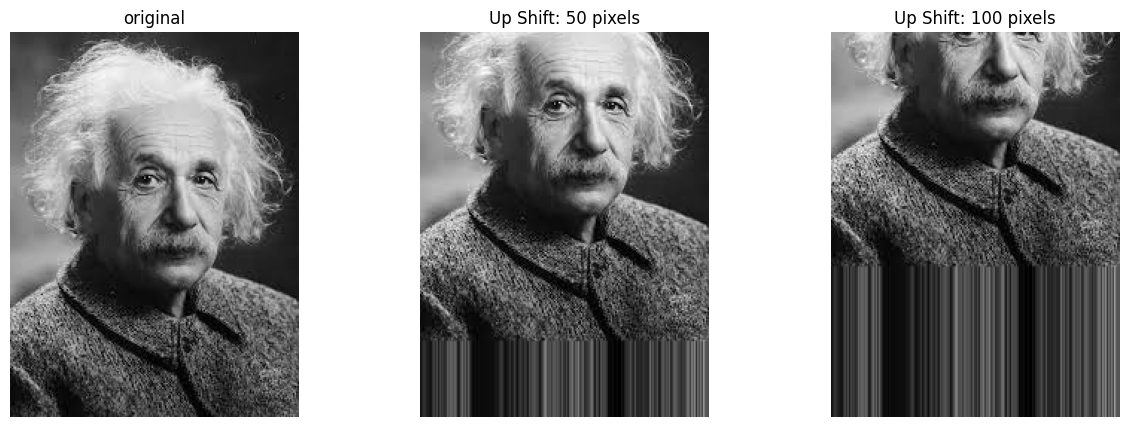

In [19]:
visualize_images([image, up_50, up_100], ['original','Up Shift: 50 pixels', 'Up Shift: 100 pixels'])

In [20]:
direction = 'down'  # Direction to shift ('left', 'right', 'up', 'down')
n = 100              # Number of iterations

shifted_images_down = iterative_shift(image, direction, n)
down_50  = shifted_images_down[50]
down_100 = shifted_images_down[100]

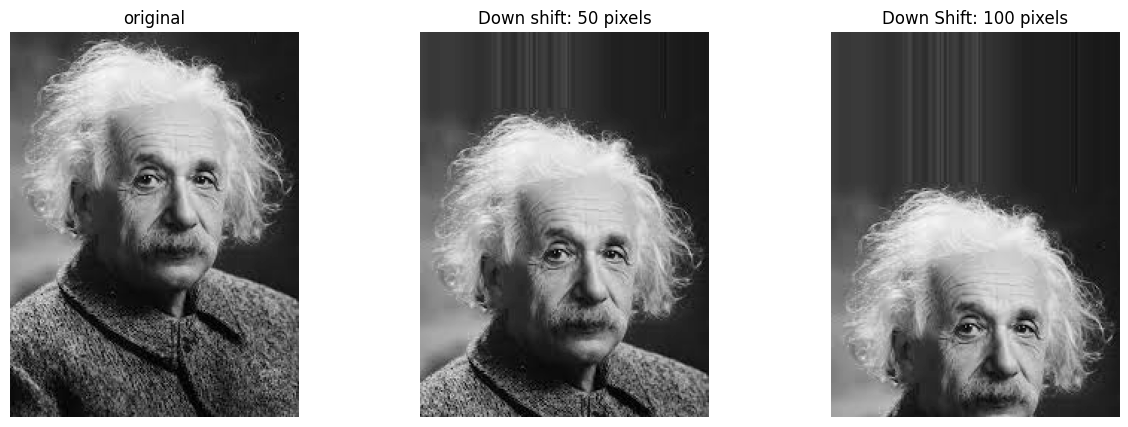

In [21]:
visualize_images([image, down_50, down_100], ['original','Down shift: 50 pixels', 'Down Shift: 100 pixels'])

# Sharpening Kernel

In [23]:
image_path = 'einstein_blur.PNG'  # Replace with your image path
image = imread(image_path, mode = 'L')

<ipython-input-23-f2a82f459ee3>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path, mode = 'L')


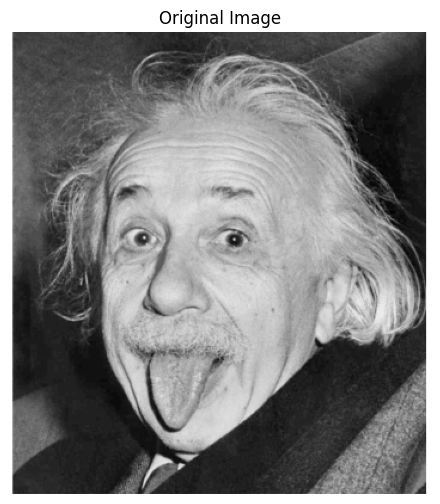

In [24]:
visualize_image(image)

In [22]:
# Function to create a sharpening filter
def create_sharpening_filter(sharpen_value):
    # Identity kernel (does nothing)
    identity_kernel = np.array([[0, 0, 0], [0, sharpen_value, 0], [0, 0, 0]])
    # Average blur kernel (3x3)
    blur_kernel = np.ones((3, 3)) / 9.0
    # Sharpening kernel
    sharpen_kernel = identity_kernel -  blur_kernel
    return sharpen_kernel


# Function to apply sharpening filter
def apply_sharpening_filter(image, sharpen_value):
    kernel = create_sharpening_filter(sharpen_value)
    sharpened_image = apply_convolution(image, kernel)
    return sharpened_image


# Function to iteratively apply the sharpening filter n times and save the images
def iterative_sharpen(image, sharpen_value, n):
    images = [image]
    current_image = image
    for i in range(n):
        current_image = apply_sharpening_filter(current_image, sharpen_value)
        images.append(current_image)
        save_image(current_image, f'sharpened_image_{i+1}.png', title=f'Sharpened Image - Iteration {i+1}')
    return images

In [25]:
sharpen_value = 2.0  # Custom sharpening value
n = 3             # Number of iterations

sharpen_2_images = iterative_sharpen(image, sharpen_value, n)

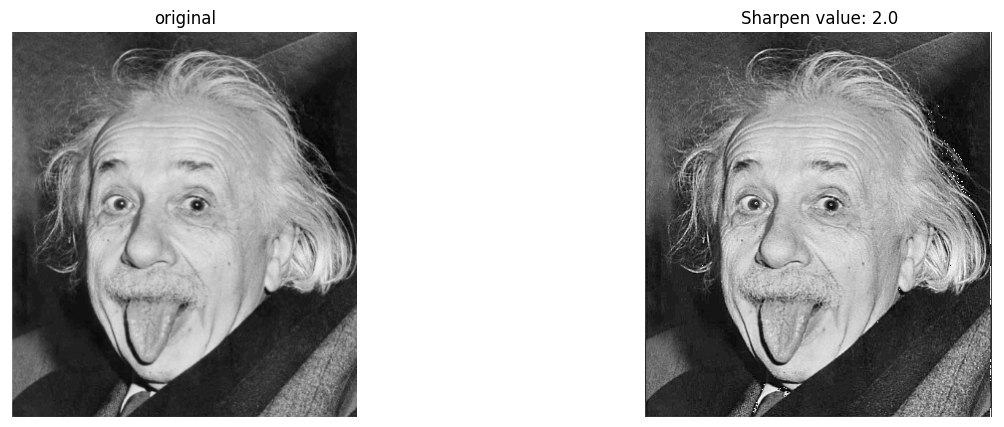

In [26]:
sharpen_2_3 = sharpen_2_images[1]
# sharpen_1_10 = sharpen_1_images[10]
# sharpen_1_20 = sharpen_1_images[20]
# visualize_images([image_10, sharpen_1_1, sharpen_1_10, sharpen_1_20], ['original','Sharpened 1', 'Sharpened 10', 'Sharpened 20'])
visualize_images([image, sharpen_2_3], ['original','Sharpen value: 2.0'])

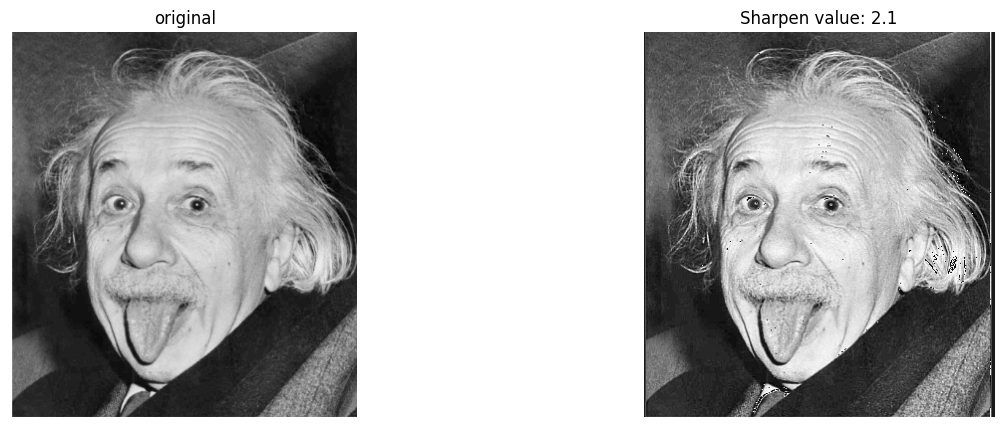

In [27]:
sharpen_value = 2.1  # Custom sharpening value
n = 1             # Number of iterations

sharpen_21_images = iterative_sharpen(image, sharpen_value, n)

sharpen_21 = sharpen_21_images[-1]
# sharpen_1_10 = sharpen_1_images[10]
# sharpen_1_20 = sharpen_1_images[20]
# visualize_images([image_10, sharpen_1_1, sharpen_1_10, sharpen_1_20], ['original','Sharpened 1', 'Sharpened 10', 'Sharpened 20'])
visualize_images([image, sharpen_21], ['original','Sharpen value: 2.1'])

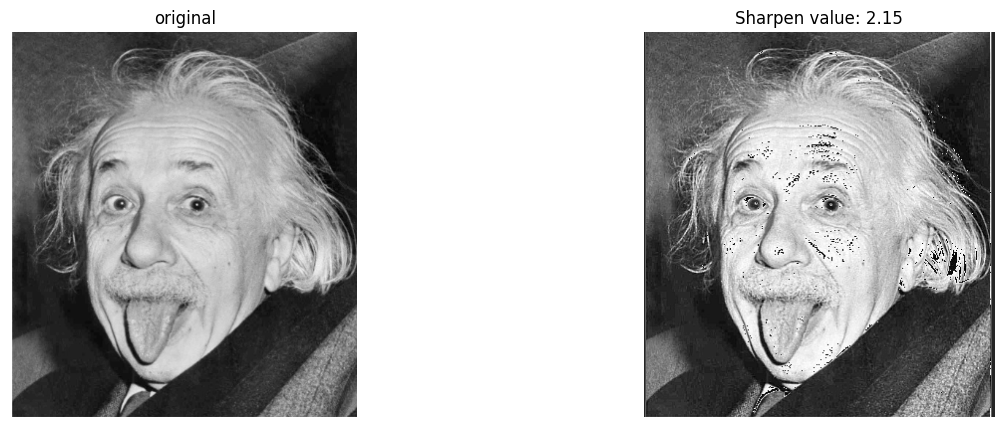

In [29]:
sharpen_value = 2.15  # Custom sharpening value
n = 1             # Number of iterations

sharpen_215_images = iterative_sharpen(image, sharpen_value, n)

sharpen_215 = sharpen_215_images[-1]
# sharpen_1_10 = sharpen_1_images[10]
# sharpen_1_20 = sharpen_1_images[20]
# visualize_images([image_10, sharpen_1_1, sharpen_1_10, sharpen_1_20], ['original','Sharpened 1', 'Sharpened 10', 'Sharpened 20'])
visualize_images([image, sharpen_215], ['original','Sharpen value: 2.15'])

In [30]:
sharpen_value = 5.0  # Custom sharpening value
n = 1              # Number of iterations
sharpen_5_images = iterative_sharpen(image, sharpen_value, n)

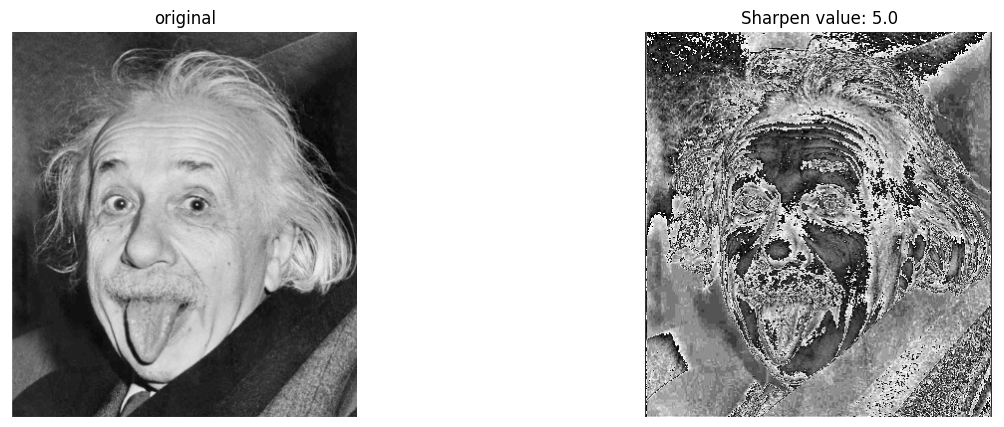

In [31]:
sharpen_5 = sharpen_5_images[-1]
visualize_images([image, sharpen_5], ['original','Sharpen value: 5.0'])

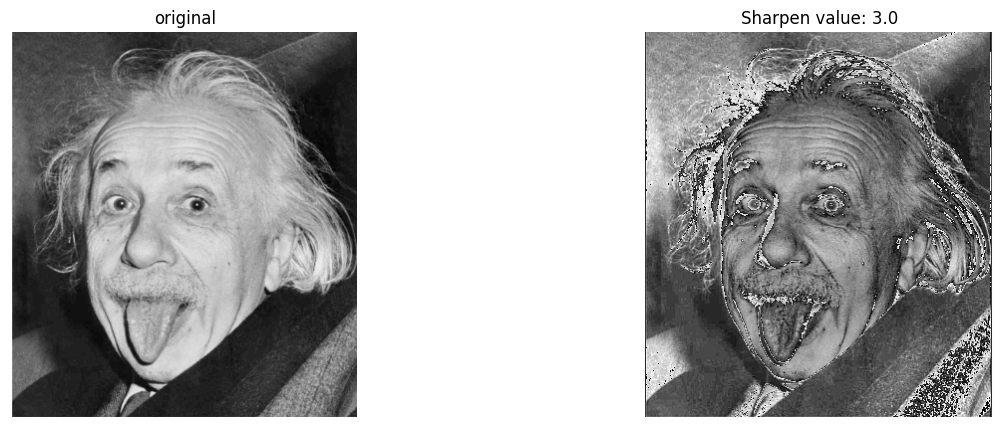

In [32]:
sharpen_value = 3.0  # Custom sharpening value
n = 1              # Number of iterations
sharpen_3_images = iterative_sharpen(image, sharpen_value, n)
sharpen_3 = sharpen_3_images[-1]
visualize_images([image, sharpen_3], ['original','Sharpen value: 3.0'])